# Analizamos los emails de cada empleado contenidos en el dataset del Instituto

Para esto se debe descargar los dataset (correos electrónicos) en formato .mbox, que se puede hacer con thunderbird o desde gmail. Al fichero descargado hay que agregarle en el nombre la extensión .mbox


In [ ]:
 #--> esto tiene que ejecutarse antes uno a uno en otro notebook
#pip install pandas
#pip install wordcloud
#pip install nltk
#pip install sklearn
#pip install scikit-learn

In [1]:
#Convertir el fichero .mbox a maildir para poder manipular mejor el contenido del correo electrónico
import mailbox

# Indicar la ruta del fichero .mbox 
mbox_path = "C:\\.......\\dataset_file.mbox"

# Indicar la ruta donde se quiere guardar el fichero que se está creando con el contenido de los correos electrónicos del .mbox en el nuevo formato maildir
maildir_path = "C:\\.......\\dataset_file"

# Abrir el fichero .mbox
mbox_file = mailbox.mbox(mbox_path)

# Crear el fichero maildir a partir del .mbox
maildir_file = mailbox.Maildir(maildir_path)

# Agregar cada e-mail del .mbox en el nuevo formato maildir
for message in mbox_file:
    
    maildir_file.add(message)

mbox_file.close()
maildir_file.close()

In [ ]:
#Después leer los correos en string para manipular mejor el texto del cuerpo de los mensajes que componen la bandeja de entreda del e-mail, 
#pues, no saldría con los diferentes tipos de formato multipart que son más complejos de decodificar. 

import pandas as pd 
import mailbox


maildir_path = "C:\\.......\\dataset_file"
maildir_file = mailbox.Maildir(maildir_path)

# Crear una lista para guardar cada mensaje
data_list = []

# Agregar cada mensaje del .maildir en la lista
for key, message in maildir_file.items():
   
    # Extraer el texto de los mensajes en formato string y convertirlo a minúsculas
    body = message.as_string().lower()
    data_list.append([body])
             
# Crear un dataFrame con los mensajes de la lista que tendrá una sola columna con nombre Texto
df_data = pd.DataFrame(data_list, columns=['Texto'])

maildir_file.close()

pd.set_option('max_colwidth',1000) #Ampliar el tamaño del dataframe para visualizar mejor su contenido

# Imprimir las dos primeras filas del dataframe creado
#df_data.head(2)

In [3]:
df_data.count()

Texto    90
dtype: int64

In [4]:
#convertimos el df a .csv para tener un backup
df_data.to_csv("C:\\...............\\mail.csv", sep= '|')

In [ ]:
#Unir todos los mensajes listado en el dataframe para obtener un solo texto con más palabras que analizar
df_full= df_data.agg('sum')
df = pd.DataFrame([df_full], columns=['Texto'])
#Imprimir el dataframe
df

In [6]:
import re
import string

#Crear una función para realizar las tareas de limpieza de datos, cuantas veces sea necesario, sobre el texto del dataframe
def clean_str1(text):
      
    text = re.sub('(?P<url>https?://[^\s]+)', ' 8888 ', text) #quitar URL's
    text = re.sub(r'[\w\-][\w\-\.]+@[\w\-][\w\-\.]+[a-zA-Z]{1,4}', ' 9999 ', text) #quitar direcciones de email's
    text = re.sub('</div>', ' ', text)  #buscar las palabras </div> en todo el texto y reemplazarlas por un espacio en blanco
    text = re.sub('\n',' ', text) #esto es para reemplazar los \n por nada de espacio
    text = re.sub('=c3=a1', 'a', text) #buscar =c3=a1 y reemplazarlo por la letra "a" - aunque en UTF-8 sería "á",
    text = re.sub('=c3=a9', 'e', text) # pero se le ha quitado la tilde a todos estos caracteres para procesar mejor el texto -
    text = re.sub('=c3=ad', 'i', text)
    text = re.sub('=c3=b3', 'o', text)
    text = re.sub('=c3=ba', 'u', text)
    text = re.sub('=c3=b1', 'ñ', text)
    text = re.sub('  +', ' ', text)  #quitar espacios en blanco
    text = re.sub(r'(?<=\w)</strong>(?=\w)',' ', text)  #quitar caracteres específicos en medio de una palabra
    text = re.sub(r'(?<=\w)\n(?=\w)',' ', text)
    text = re.sub('  +', ' ', text)  #quitar espacios en blanco
    text = re.sub(r'(?<=\w)=\n(?=\w)',' ', text)
   
      
    return text.strip().lower()

clean1 = lambda x: clean_str1(x)

# Aplicar los cambios y guardarlos en un nuevo dataframe
df1 = pd.DataFrame(df.Texto.apply(clean1).dropna()) 

In [8]:
#Importar las librerías necesarias para analizar textos
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
import re
import string

def clean_str2(text):

    text = re.sub("\b*\d\b*", "", text) ##quita los dígitos sueltos y que están entre palabras
    text = re.sub(r"\b\w\b", " ", text) ##quita las letras sueltas
    text = re.sub(' +', ' ', text)  #quita espacios en blanco entre palabras
    text = re.sub(r"\b\w\b", " ", text) ##quita las letras sueltas
    text = re.sub(' +', ' ', text)  #quita espacios en blanco entre palabras
    text = re.sub(r"\b\w\b", " ", text) ##quita las letras sueltas
    text = re.sub('=c3=a1', 'a', text)
    text = re.sub('=c3=a9', 'e', text)
    text = re.sub('=c3=ad', 'i', text)
    text = re.sub('=c3=b3', 'o', text)
    text = re.sub('=c3=ba', 'u', text)
    text = re.sub('=c3=b1', 'ñ', text)#buscar =c3=b1 y reemplazarlo por la letra "ñ" - decodificando caracteres especiales en UTF-8-
    text = re.sub(' +', ' ', text)  #quita espacios en blanco entre palabras ok
    text = re.sub(r"[%s]" % re.escape(string.punctuation), " ", text) # Quitar todos los signos de puntuación
    text = re.sub(' +', ' ', text)  #quita espacios en blanco entre palabras

    return text.strip().lower()

clean2 = lambda x: clean_str2(x)

df2 = pd.DataFrame(df1.Texto.apply(clean2).dropna()) 

In [10]:
df2

Texto
0  mozilla status mozilla status return path authentication results kundenserver de dkim pass header gmail com received from mail ed google com by mx kundenserver de mxeue with esmtps nemesis id msjui phujio scuk for wed feb received by mail ed google com with smtp id cksoedb for wed feb pst dkim signature rsa sha relaxed relaxed gmail com to subject message id date from mime version from to cc subject date message id reply to bh kbrylsqptosszxcgtcdkxhsooqiustohbjhdao mitxqysynzmxwsuipwrj vsczclbldjkfthlhbriwne aqqizth dl emzfjatwkmvaihoybfkcazcqvl lnjgtlzcowdudumwiqnmvndqvdkfym qtkkrcgmztewwrskzbxrthsdxakpr lzsxho dwnhxwwqbuvrtzoqzlqcc mqqbgocgsrouhcewtzdmjuznehakq duwfhhpg ucbvq vgxckhhjmktc xavdqhtcxcnodvctijusbranqghedaa hxkccs upuxwwbcquvqkmw iaw google dkim signature rsa sha relaxed relaxed net to subject message id date from mime version gm message state from to cc subject date message id reply to bh kbrylsqptosszxcgtcdkxhsooqiustohbjhdao gkmdhejxwhakkacagnczpbrxuhfueuyioavhpkm...

In [11]:
#Quitar las palabras en inglés definidas en la lista stop_words de python
stop_words = stopwords.words('english')
df2['Texto'] = df2['Texto'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [12]:
#Quitar las palabras en español definidas en la lista stop_words de python
stop_words = stopwords.words('spanish')
df2['Texto'] = df2['Texto'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [13]:
df2

Texto
0  mozilla status mozilla status return path authentication results kundenserver dkim pass header gmail com received mail ed google com mx kundenserver mxeue esmtps nemesis id msjui phujio scuk wed feb received mail ed google com smtp id cksoedb wed feb pst dkim signature rsa sha relaxed relaxed gmail com subject message id date mime version cc subject date message id reply bh kbrylsqptosszxcgtcdkxhsooqiustohbjhdao mitxqysynzmxwsuipwrj vsczclbldjkfthlhbriwne aqqizth dl emzfjatwkmvaihoybfkcazcqvl lnjgtlzcowdudumwiqnmvndqvdkfym qtkkrcgmztewwrskzbxrthsdxakpr lzsxho dwnhxwwqbuvrtzoqzlqcc mqqbgocgsrouhcewtzdmjuznehakq duwfhhpg ucbvq vgxckhhjmktc xavdqhtcxcnodvctijusbranqghedaa hxkccs upuxwwbcquvqkmw iaw google dkim signature rsa sha relaxed relaxed net subject message id date mime version gm message state cc subject date message id reply bh kbrylsqptosszxcgtcdkxhsooqiustohbjhdao gkmdhejxwhakkacagnczpbrxuhfueuyioavhpkmnyygsoiysbt nquwfd ajmhosnz nbpmobkcfxirewvtcbngpvks yfls sewidchcpyvvrgu...

In [14]:
import re
import string

def clean_str3(text):

    text = re.sub(r'\b\w{2}\b', '', text) #quita las palabras con dos letras
    text = re.sub(r'\b\w{3}\b', '', text) #quita las palabras con tres letras
    text = re.sub(' +', ' ', text)  #quita espacios en blanco entre palabras

    return text.strip().lower()

clean3 = lambda x: clean_str3(x)

df3 = pd.DataFrame(df2.Texto.apply(clean3).dropna()) 


In [15]:
df3

Texto
0  mozilla status mozilla status return path authentication results kundenserver dkim pass header gmail received mail google kundenserver mxeue esmtps nemesis msjui phujio scuk received mail google smtp cksoedb dkim signature relaxed relaxed gmail subject message date mime version subject date message reply kbrylsqptosszxcgtcdkxhsooqiustohbjhdao mitxqysynzmxwsuipwrj vsczclbldjkfthlhbriwne aqqizth emzfjatwkmvaihoybfkcazcqvl lnjgtlzcowdudumwiqnmvndqvdkfym qtkkrcgmztewwrskzbxrthsdxakpr lzsxho dwnhxwwqbuvrtzoqzlqcc mqqbgocgsrouhcewtzdmjuznehakq duwfhhpg ucbvq vgxckhhjmktc xavdqhtcxcnodvctijusbranqghedaa hxkccs upuxwwbcquvqkmw google dkim signature relaxed relaxed subject message date mime version message state subject date message reply kbrylsqptosszxcgtcdkxhsooqiustohbjhdao gkmdhejxwhakkacagnczpbrxuhfueuyioavhpkmnyygsoiysbt nquwfd ajmhosnz nbpmobkcfxirewvtcbngpvks yfls sewidchcpyvvrgudhd bfuk mrlpohjwyzyicoypjdganzwxac sxmhtfvmimjnknznxezdtelotywuye ppeaksklaqlybublhhkoufzi efkovhzicfyzb...

In [16]:
# A medida que se imprimen los resultados de aplicar las funciones de limpieza y stop_words sobre el texto del dataframe
#es posible notar qué palabras en español/inglés no aportan valor para el análisis (por ejemplo: cabeceras del mensaje como
#"mime-version") y es necesario crear una lista personalizada con estas palabras para luego poder quitarlas del texto y 
#y obtener resultados más precisos tras la limpieza de los datos

#Crear la lista de palabras
#own_stop_words = ['fdbfaa','aaacjzptmf','aaapykc','alt','stron','solo','vale','revx','gracias','ecom','elacion','llevar','rati','ejer','ollo','caracter']

#Crear un fichero para escribir en este la lista de palabras
#with open('C:\........\own_stop_words.txt', 'w') as file: 
 #   for item in specific_stop_words:
  #      file.write("%s\n" % item)

In [17]:
#Leer la lista para quitar del texto dicho listado de palabras
with open('C:\\..........\\specific_words.txt') as list_own:
    own_stop_words = list_own.read()
   # print(own_stop_words)

df3['Texto'] = df3['Texto'].apply(lambda x: ' '.join([word for word in x.split() if word not in (own_stop_words)]))

In [18]:
df3

Texto
0  kundenserver gmail received google kundenserver nemesis msjui phujio scuk received google cksoedb relaxed relaxed gmail kbrylsqptosszxcgtcdkxhsooqiustohbjhdao mitxqysynzmxwsuipwrj vsczclbldjkfthlhbriwne aqqizth emzfjatwkmvaihoybfkcazcqvl lnjgtlzcowdudumwiqnmvndqvdkfym qtkkrcgmztewwrskzbxrthsdxakpr lzsxho dwnhxwwqbuvrtzoqzlqcc mqqbgocgsrouhcewtzdmjuznehakq duwfhhpg ucbvq vgxckhhjmktc xavdqhtcxcnodvctijusbranqghedaa hxkccs upuxwwbcquvqkmw google relaxed relaxed kbrylsqptosszxcgtcdkxhsooqiustohbjhdao gkmdhejxwhakkacagnczpbrxuhfueuyioavhpkmnyygsoiysbt nquwfd ajmhosnz nbpmobkcfxirewvtcbngpvks yfls sewidchcpyvvrgudhd bfuk mrlpohjwyzyicoypjdganzwxac sxmhtfvmimjnknznxezdtelotywuye ppeaksklaqlybublhhkoufzi efkovhzicfyzbbrlkiezjzxovsg ccotdfqevxguqkcmvcdttwucwxqrtigvcjkohbjckyhyr yxpa ocxq aoyukvc hfabxrulyhhoqo yrbndiitesxuicudayi mxyicnpjnmyliyoenyzgeje ginwcnckxkzpt google source aksetghjdqrvsgdfqzmracyilbkvpt uuyddceucfupgydnyhxityiwruce thjjzttpfjlhg received acebbebecmrejb ruth gomez g...

In [19]:
import re
import string

def clean_str4(text):

    text = re.sub(r'\b\w{2}\b', '', text) #quita las palabras con dos letras
    text = re.sub(r'\b\w{3}\b', '', text) #quita las palabras con tres letras
    text = re.sub(' +', ' ', text)  #quita espacios en blanco entre palabras

    return text.strip().lower()

clean4 = lambda x: clean_str4(x)

df4 = pd.DataFrame(df3.Texto.apply(clean4).dropna()) 


In [20]:
df4

Texto
0  kundenserver gmail received google kundenserver nemesis msjui phujio scuk received google cksoedb relaxed relaxed gmail kbrylsqptosszxcgtcdkxhsooqiustohbjhdao mitxqysynzmxwsuipwrj vsczclbldjkfthlhbriwne aqqizth emzfjatwkmvaihoybfkcazcqvl lnjgtlzcowdudumwiqnmvndqvdkfym qtkkrcgmztewwrskzbxrthsdxakpr lzsxho dwnhxwwqbuvrtzoqzlqcc mqqbgocgsrouhcewtzdmjuznehakq duwfhhpg ucbvq vgxckhhjmktc xavdqhtcxcnodvctijusbranqghedaa hxkccs upuxwwbcquvqkmw google relaxed relaxed kbrylsqptosszxcgtcdkxhsooqiustohbjhdao gkmdhejxwhakkacagnczpbrxuhfueuyioavhpkmnyygsoiysbt nquwfd ajmhosnz nbpmobkcfxirewvtcbngpvks yfls sewidchcpyvvrgudhd bfuk mrlpohjwyzyicoypjdganzwxac sxmhtfvmimjnknznxezdtelotywuye ppeaksklaqlybublhhkoufzi efkovhzicfyzbbrlkiezjzxovsg ccotdfqevxguqkcmvcdttwucwxqrtigvcjkohbjckyhyr yxpa ocxq aoyukvc hfabxrulyhhoqo yrbndiitesxuicudayi mxyicnpjnmyliyoenyzgeje ginwcnckxkzpt google source aksetghjdqrvsgdfqzmracyilbkvpt uuyddceucfupgydnyhxityiwruce thjjzttpfjlhg received acebbebecmrejb ruth gomez g...

In [21]:
## Convertir el corpus (con datos limpios) a pickle para luego poder analizarlo
df4.to_pickle("C:\\........\\mail_clean.pkl")

### Ahora creamos la matriz para contar la frecuencia de palabras

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data_cv = cv.fit_transform(df3.Texto)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = df4.index
data_dtm

aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaab   
0                                                                             3  \

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaac   
0                                                                             1  \

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaad   
0                                                                             3  \

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaae   
0                                                                             1  \

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah   
0                                                                             1  \

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaak   
0                                                                             1  \

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaam   
0                                                                             1  \

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaan   
0                                                                             1  \

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaao   
0                                                                             1  \

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaap   
0                                                                             1  \

   ...  zzzxqrgwqisvcwupdguf  zzzynxepdvrhkslfuqkdrcslei   
0  ...                     2                           1  \

   zzzyqtarnayktvyiexwazorwowcnjrqlgyw  zzzz   
0                                    1     1  \

   zzzzcbrocoqadpyxqbfmwitsbtefdzexijsyzhznplewqhspp  zzzzll   
0                                                  1       1  \

   zzzzofrxjmrblyqlymeav  zzzzskamqowzqlyjtbwclrmygu   
0                      1                           1  \

   zzzzskamqowzqlyjtbwclrmyguevclfhqjwhhy  zzzzzzmapa  
0                                       1           1  

[1 rows x 1182584 columns]

In [23]:
#Guardar el count vectorizer (cv)
data_dtm.to_pickle("C:\\...............\\mail_dtm.pkl")

In [24]:
# Leemos y transponemos el document-term matrix para luego poder contar las palabras más comunes sin perder los índices
import pandas as pd
import pickle

data = pd.read_pickle("C:\\.................\\email_dtm.pkl")
data = data.transpose()
data.sample(2)

0
wpjkh            1
mcffmnwxrhjwydx  1

In [25]:
data.count()

0    1182584
dtype: int64

In [26]:
# Crear un diccionario con los datos de la matriz transpuesta que contiene dos columnas, 
#una con las palabras y otra con su frecuencia. Con esto y utilizando .head() se obtiene el top "n" palabras más repetidas
top_dict = {}
for c in data.columns:
    #Agregar .head(200) y la cant de primeras filas que se quiera mostrar
    top = data[c].sort_values(ascending=False).head(400) 
    top_dict[c]= list(zip(top.index, top.values))

In [27]:
#Imprimir el diccionario
top_dict

{0: [('webkit', 4437),
  ('jymbii', 1984),
  ('linkedin', 1762),
  ('aemail', 820),
  ('midtoken', 769),
  ('card', 769),
  ('word', 599),
  ('mercado', 588),
  ('media', 548),
  ('bicubic', 410),
  ('device', 393),
  ('babybear', 382),
  ('company', 376),
  ('network', 359),
  ('assets', 356),
  ('apple', 356),
  ('frontend', 355),
  ('face', 352),
  ('datos', 340),
  ('solid', 332),
  ('oxygen', 323),
  ('conversations', 315),
  ('hero', 312),
  ('pablo', 302),
  ('españa', 279),
  ('gmail', 272),
  ('start', 248),
  ('relaxed', 243),
  ('femail', 242),
  ('radius', 241),
  ('torre', 236),
  ('kundenserver', 221),
  ('roboto', 213),
  ('eview', 212),
  ('instituto', 211),
  ('papabear', 210),
  ('flex', 205),
  ('received', 203),
  ('google', 196),
  ('neptune', 181),
  ('dred', 179),
  ('demail', 177),
  ('logo', 174),
  ('organic', 173),
  ('tecnologico', 168),
  ('fira', 168),
  ('droid', 165),
  ('ubuntu', 165),
  ('list', 164),
  ('shadow', 163),
  ('grande', 163),
  ('fixed', 1

In [28]:
# Imprimir el diccionario creado como una lista de palabras
for employee, top_words in top_dict.items():
    print(employee)
    print(', '.join([word for word, count in top_words[0:400]]))
    print('----------------------------')

0
webkit, jymbii, linkedin, aemail, midtoken, card, word, mercado, media, bicubic, device, babybear, company, network, assets, apple, frontend, face, datos, solid, oxygen, conversations, hero, pablo, españa, gmail, start, relaxed, femail, radius, torre, kundenserver, roboto, eview, instituto, papabear, flex, received, google, neptune, dred, demail, logo, organic, tecnologico, fira, droid, ubuntu, list, shadow, grande, fixed, wilton, profile, cantarell, derechos, noticias, mamabear, recursos, educativos, efeed, personal, layout, correo, informacion, ecard, recommendedflavor, empleo, home, envelope, view, sevilla, ireland, director, proteccion, premium, baja, tratamiento, single, comercial, hover, data, notas, anuncio, windowtext, hiring, nemesis, social, source, icon, ddevice, welcome, cumplimiento, andalucia, empleos, phoenix, ionos, mobile, plataforma, ayuda, spacer, busca, alternative, objeto, parte, exchange, compartido, medium, check, empresa, marcas, webki, place, logotipo, diseño

In [29]:
#Cantidad de palabras
employees = data.columns.values

unique_list = []
for body in data.columns:
    uniques = data[body].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Creamos un dataframe con la cantidad de palabras únicas
data_words = pd.DataFrame(list(zip(employees, unique_list)), columns=['Empleados','Palabras_únicas'])
data_unique_sort = data_words.sort_values(by='Palabras_únicas')
data_unique_sort

Empleados  Palabras_únicas
0          0          1182584

In [30]:
#Calculamos la cantidad total de palabras utilizadas por cada empleado
employees = data.columns.values

total_list = []
for body in data.columns:
    total = data[body].to_numpy().sum()
    total_list.append(total)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(employees, total_list)), columns=['Empleados','Total_palabras'])
data_total_sort = data_words.sort_values(by='Total_palabras')
data_total_sort

Empleados  Total_palabras
0          0         1302866

### Ahora mostramos en un gráfico wordcloud las palabras más usadas por cada empleado

In [31]:
import pandas as pd
import pickle

#Leer el corpus .pkl creado tras la limpieza del texto y renombrarlo como data_corpus para trabajar el wordcloud
data_corpus = pd.read_pickle("C:\\...............\\mail_clean.pkl")
data_corpus.head(2)

Texto
0  kundenserver gmail received google kundenserver nemesis msjui phujio scuk received google cksoedb relaxed relaxed gmail kbrylsqptosszxcgtcdkxhsooqiustohbjhdao mitxqysynzmxwsuipwrj vsczclbldjkfthlhbriwne aqqizth emzfjatwkmvaihoybfkcazcqvl lnjgtlzcowdudumwiqnmvndqvdkfym qtkkrcgmztewwrskzbxrthsdxakpr lzsxho dwnhxwwqbuvrtzoqzlqcc mqqbgocgsrouhcewtzdmjuznehakq duwfhhpg ucbvq vgxckhhjmktc xavdqhtcxcnodvctijusbranqghedaa hxkccs upuxwwbcquvqkmw google relaxed relaxed kbrylsqptosszxcgtcdkxhsooqiustohbjhdao gkmdhejxwhakkacagnczpbrxuhfueuyioavhpkmnyygsoiysbt nquwfd ajmhosnz nbpmobkcfxirewvtcbngpvks yfls sewidchcpyvvrgudhd bfuk mrlpohjwyzyicoypjdganzwxac sxmhtfvmimjnknznxezdtelotywuye ppeaksklaqlybublhhkoufzi efkovhzicfyzbbrlkiezjzxovsg ccotdfqevxguqkcmvcdttwucwxqrtigvcjkohbjckyhyr yxpa ocxq aoyukvc hfabxrulyhhoqo yrbndiitesxuicudayi mxyicnpjnmyliyoenyzgeje ginwcnckxkzpt google source aksetghjdqrvsgdfqzmracyilbkvpt uuyddceucfupgydnyhxityiwruce thjjzttpfjlhg received acebbebecmrejb ruth gomez g...

In [32]:
#Crear una lista de las palabras que contiene el texto analizado
text_to_list = ' '.join(data_corpus['Texto'].tolist())
#Contar la frecuencia de repetición de cada palabra que se ha agregado a la lista creada
word_frequency = pd.Series(text_to_list.split()).value_counts()
#word_frecuency
top_words = word_frequency.head(400)
top_words

webkit                   4437
jymbii                   1984
linkedin                 1762
aemail                    820
card                      769
                         ... 
recomendaciones            30
btzdyinasahjsrkldvfjq      30
tentitem                   30
mcnfollowcon               30
cmvu                       30
Name: count, Length: 400, dtype: int64

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


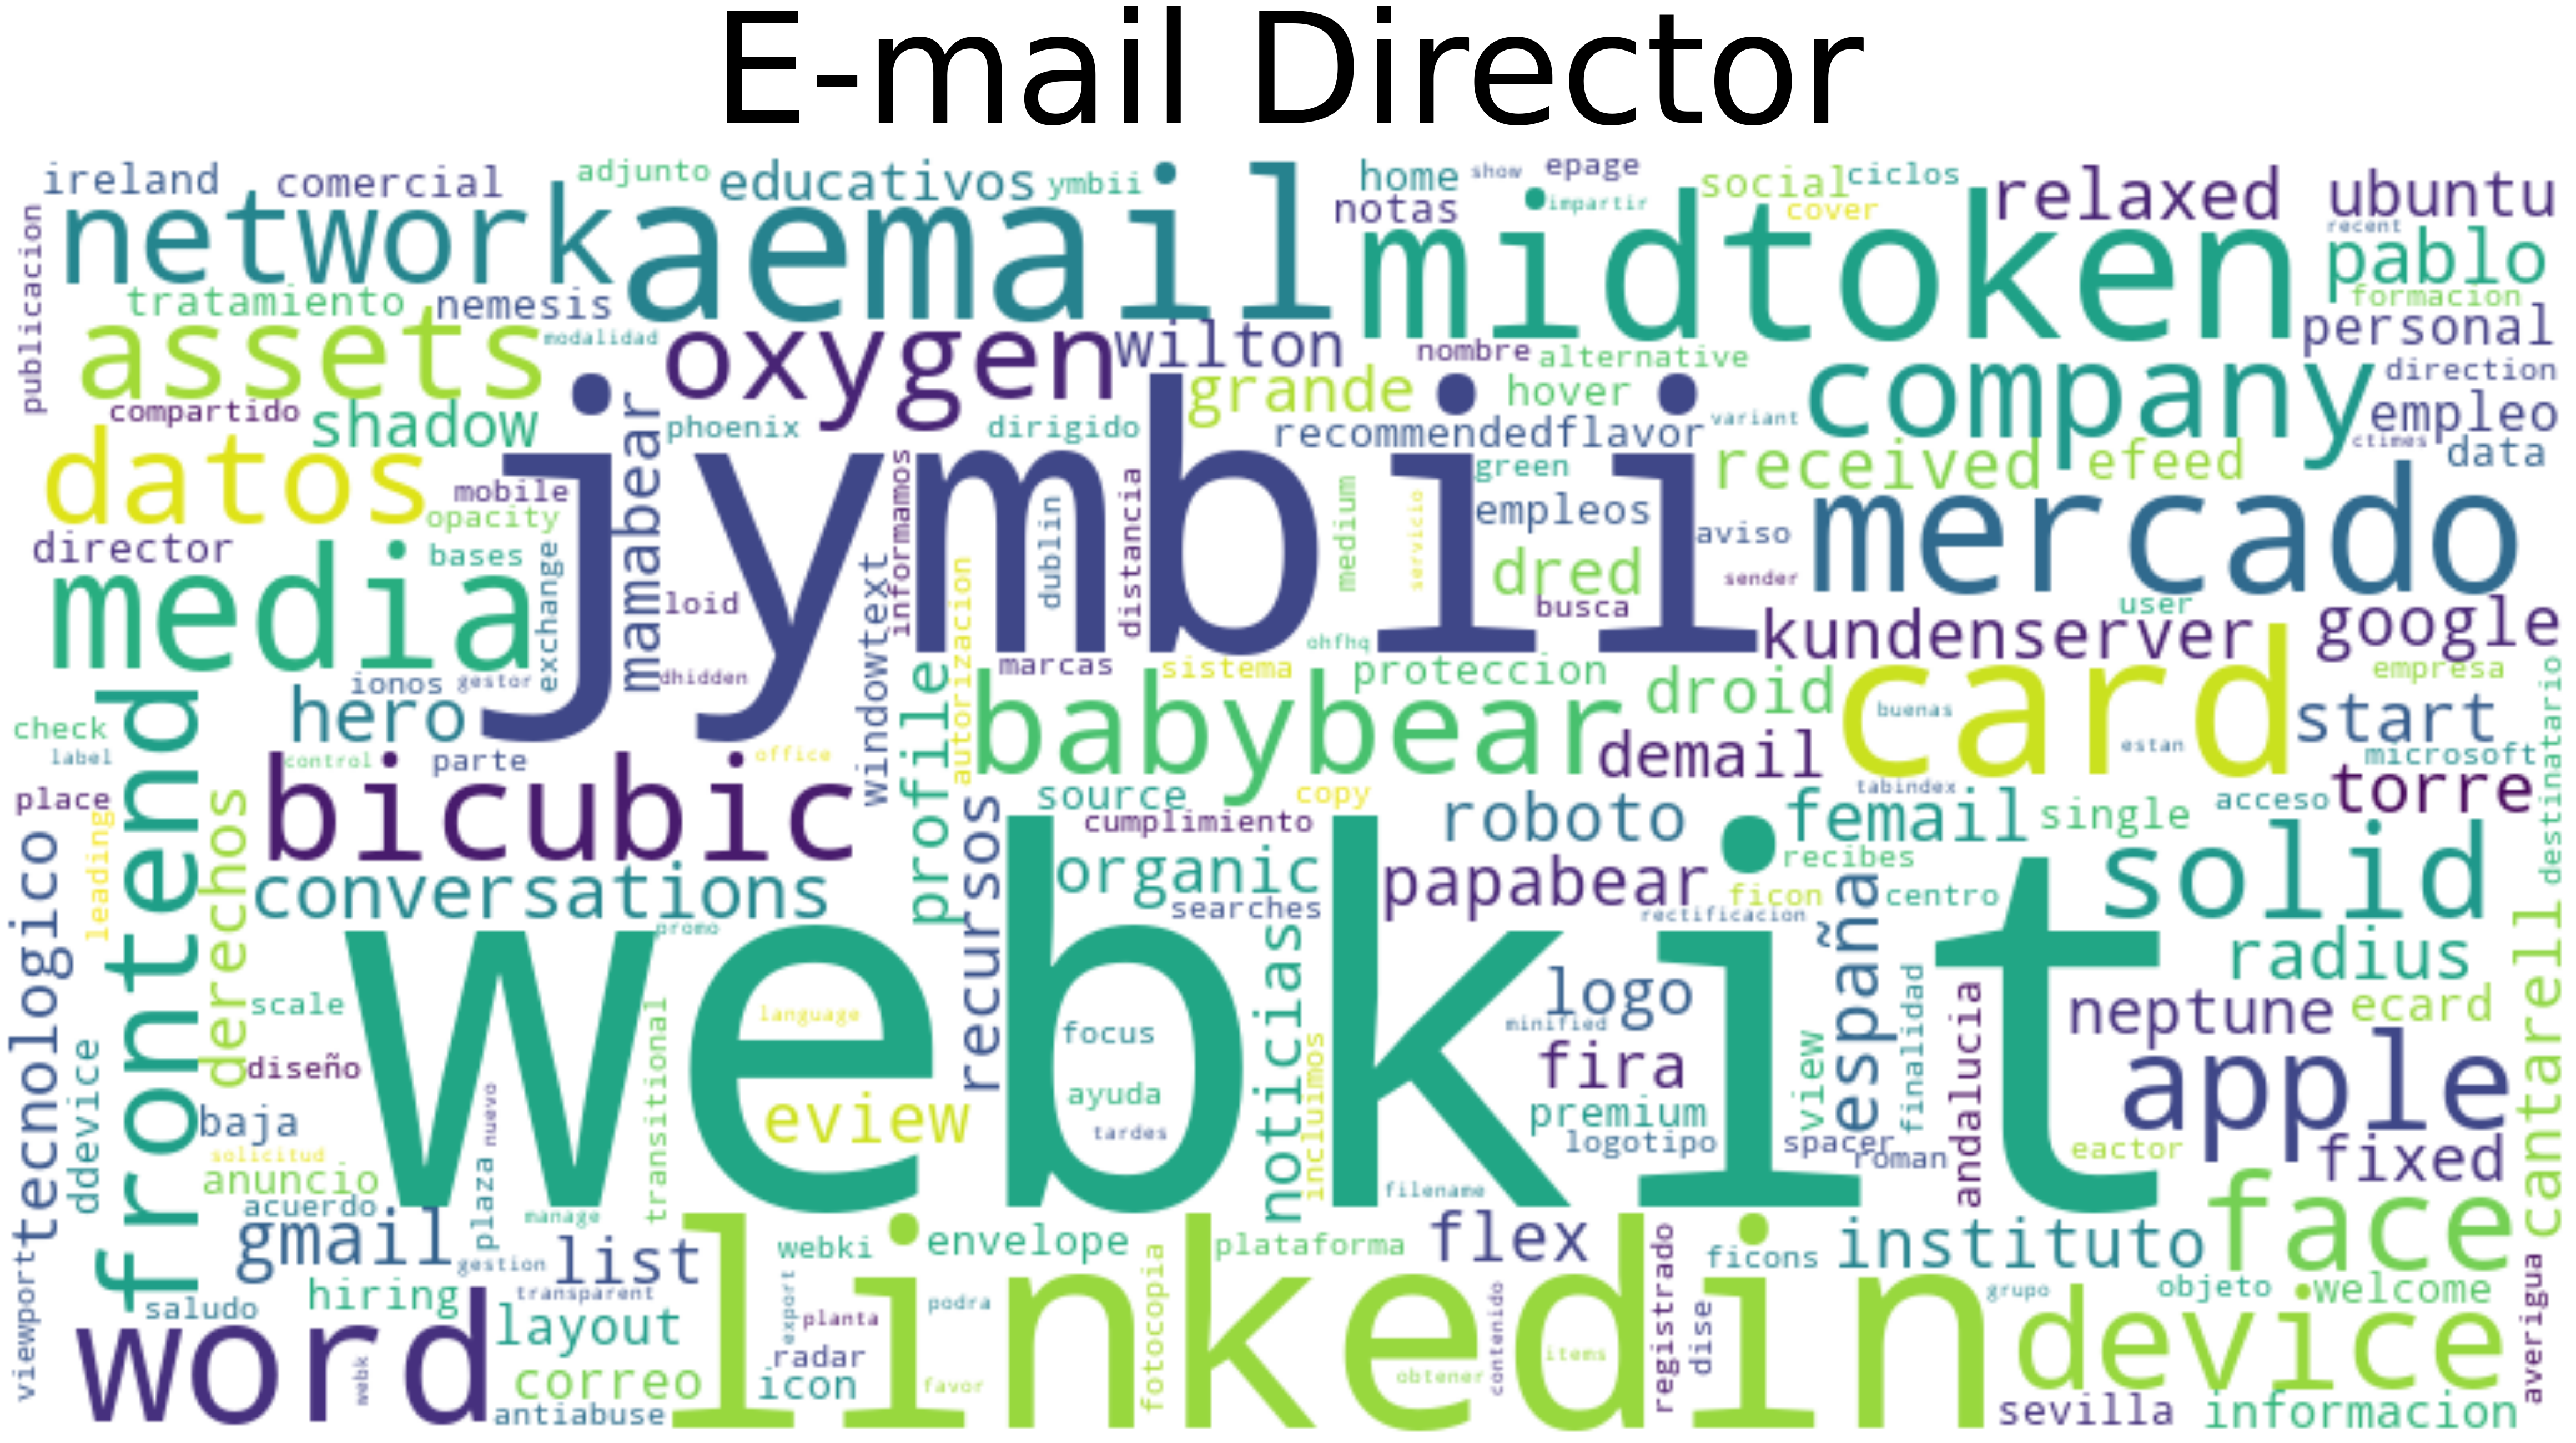

In [34]:
#Importamos las librerías para crear un wordcloud de las 200 palabras más repetidas en el texto analizado
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stop_words = set(STOPWORDS)
#stop_words  #imprimir listado de palabras en inglés que contiene STOPWORDS de python
wc = WordCloud(height= 400, width=800, background_color="white",
               stopwords=stop_words).generate_from_frequencies(top_words)

# Crear el gráfico wordcloud utilizando Matplotlib y guardarlo como .png
plt.figure(figsize=(100, 30))
plt.tight_layout(pad=2)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('E-mail Director', fontsize=200)
plt.savefig ("C:\\....\\email_empleado.png")
#Imprimir el wordcloud en el mismo notebook
plt.show()